# Naive Bayes Classifier


## 1. Load data
- Đọc dữ liệu từ dữ liệu đã xử lý: processed_data

In [ ]:
import pandas as pd 
data = pd.read_csv(r"../resources/processed_data.csv")
data.head()

,Processed_Review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


### Đặc trưng số hóa và chia tập dữ liệu

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
# Chuyển dữ liệu sang đặc trưng số sử dụng TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2)) 
X = tfidf.fit_transform(data['Processed_Review']).toarray()
# Chia data thành các tập train và test
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 2. Chạy mô hình

### 2.1 Sử dụng các mô hình MultinomialNB, BernoulliNB, GaussianNB từ SKlearn

In [4]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Danh sách các mô hình
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# Huấn luyện và đánh giá từng mô hình
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Tính độ chính xác và báo cáo phân loại
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # In kết quả
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(report)
    print('\n' + '-' * 30 + '\n')

--- GaussianNB ---
Accuracy: 0.8280336134453782
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      7461
    positive       0.83      0.83      0.83      7414

    accuracy                           0.83     14875
   macro avg       0.83      0.83      0.83     14875
weighted avg       0.83      0.83      0.83     14875


------------------------------

--- MultinomialNB ---
Accuracy: 0.8627899159663865
Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      7461
    positive       0.85      0.88      0.87      7414

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875


------------------------------

--- BernoulliNB ---
Accuracy: 0.8617142857142858
Classification Report:
              precision    recall  f1-score   support

    nega

### 2.2 Tìm kiếm siêu tham số alpha

Best Parameters: 2.1544346900318843
Train Accuracy: 0.8813495836574754
Train Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.86      0.88     17237
    positive       0.87      0.90      0.88     17470

    accuracy                           0.88     34707
   macro avg       0.88      0.88      0.88     34707
weighted avg       0.88      0.88      0.88     34707



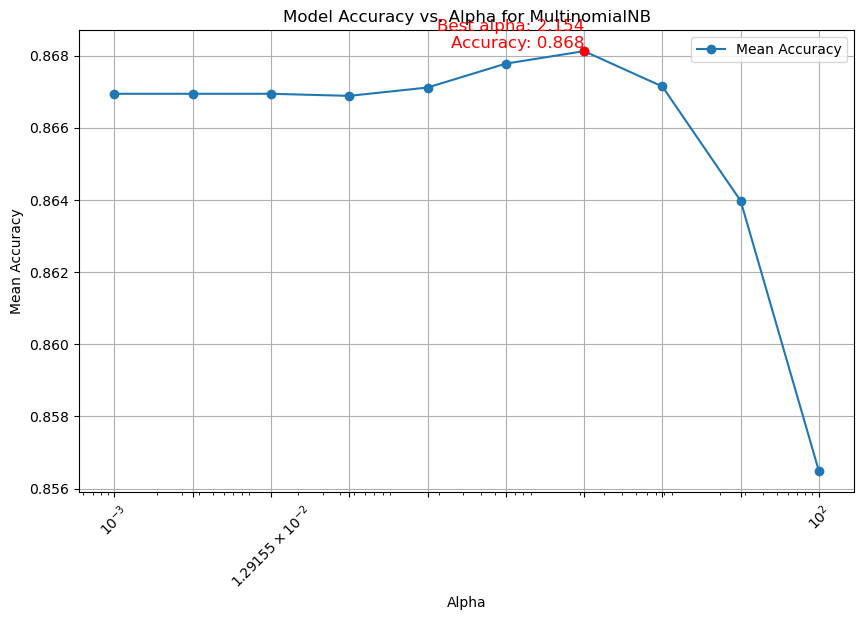

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

# Định nghĩa các giá trị của siêu tham số alpha
parameters = {'alpha': np.logspace(-3, 2, num=10)}

# Tạo mô hình Multinomial Naive Bayes
mnb = MultinomialNB()

# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất trên tập train với 5-fold cross-validation
clf = GridSearchCV(mnb, parameters, cv=10)
clf.fit(X_train, y_train)

# Lấy giá trị alpha tốt nhất từ GridSearchCV
best_alpha = clf.best_params_['alpha']

# Đánh giá mô hình trên tập train với alpha tốt nhất
best_mnb = MultinomialNB(alpha=best_alpha)
best_mnb.fit(X_train, y_train)
y_train_pred = best_mnb.predict(X_train)

# Đánh giá mô hình
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print(f"Best Parameters: {clf.best_params_['alpha']}")
print(f'Train Accuracy: {train_accuracy}')
print('Train Classification Report:')
print(train_report)

# Vẽ biểu đồ độ chính xác trung bình so với các giá trị alpha
mean_accuracy = clf.cv_results_['mean_test_score']
alpha_values = parameters['alpha']

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_accuracy, marker='o', label='Mean Accuracy')

# Highlight the best alpha value
best_accuracy = max(mean_accuracy)
plt.scatter([best_alpha], [best_accuracy], color='red', zorder=5)
plt.text(best_alpha, best_accuracy, f'Best alpha: {best_alpha:.3f}\nAccuracy: {best_accuracy:.3f}', 
         horizontalalignment='right', verticalalignment='bottom', fontsize=12, color='red')

plt.title('Model Accuracy vs. Alpha for MultinomialNB')
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.xscale('log')
plt.xticks(alpha_values, rotation=45)
plt.grid()
plt.legend()
plt.show()

### Độ chính xác mô hình với siêu tham số alpha tìm được ở trên

In [28]:
mul = MultinomialNB(alpha=best_alpha)
# Huấn luyện mô hình
mul.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = mul.predict(X_test)

# Tính độ chính xác và báo cáo phân loại
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# In kết quả
print(f'--- MultinomialNB ---')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('\n' + '-' * 30 + '\n')

--- MultinomialNB ---
Accuracy: 0.8618487394957983
Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      7461
    positive       0.85      0.88      0.86      7414

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875


------------------------------



### Độ chính xác trên tập test với các giá trị của alpha

Best alpha: 7.742636826811277
Best test accuracy: 0.8634621848739495


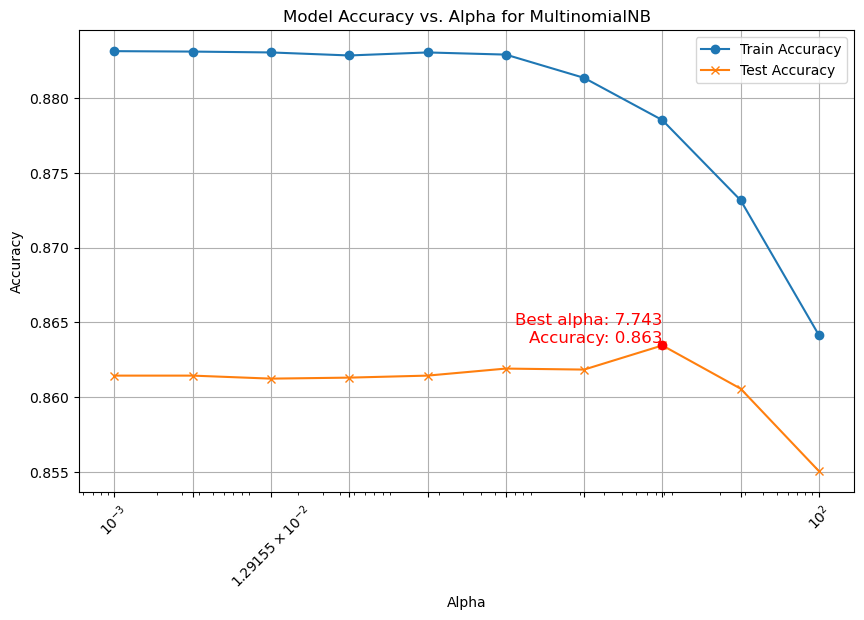

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

# Định nghĩa các giá trị của siêu tham số alpha
alpha_values = np.logspace(-3, 2, num=10)

# Danh sách để lưu trữ độ chính xác
train_accuracies = []
test_accuracies = []

# Lặp qua từng giá trị alpha
for alpha in alpha_values:
    # Tạo mô hình Multinomial Naive Bayes với alpha hiện tại
    mnb = MultinomialNB(alpha=alpha)
    
    # Huấn luyện mô hình trên tập train
    mnb.fit(X_train, y_train)
    
    # Dự đoán trên tập train và test
    y_train_pred = mnb.predict(X_train)
    y_test_pred = mnb.predict(X_test)
    
    # Tính độ chính xác trên tập train và test
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Lưu trữ độ chính xác
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Tìm alpha tốt nhất dựa trên độ chính xác trên tập test
best_alpha_index = np.argmax(test_accuracies)
best_alpha = alpha_values[best_alpha_index]
best_test_accuracy = test_accuracies[best_alpha_index]

print(f'Best alpha: {best_alpha}')
print(f'Best test accuracy: {best_test_accuracy}')

# Vẽ biểu đồ độ chính xác so với các giá trị alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(alpha_values, test_accuracies, marker='x', label='Test Accuracy')

# Highlight the best alpha value
plt.scatter([best_alpha], [best_test_accuracy], color='red', zorder=5)
plt.text(best_alpha, best_test_accuracy, f'Best alpha: {best_alpha:.3f}\nAccuracy: {best_test_accuracy:.3f}', 
         horizontalalignment='right', verticalalignment='bottom', fontsize=12, color='red')

plt.title('Model Accuracy vs. Alpha for MultinomialNB')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xticks(alpha_values, rotation=45)
plt.grid()
plt.legend()
plt.show()